In [1]:
import librosa
import numpy as np
y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)
hop = int(sr*0.025) # hop for 25 ms
n_fft = 2048 # window
print(f'fft window = {n_fft/sr*1000:.2f}ms -- hop = {hop/sr*1000:.2f}ms')
D = np.abs(librosa.stft(y, hop_length=hop, n_fft=n_fft))
D.shape

fft window = 92.88ms -- hop = 24.99ms


(1025, 201)

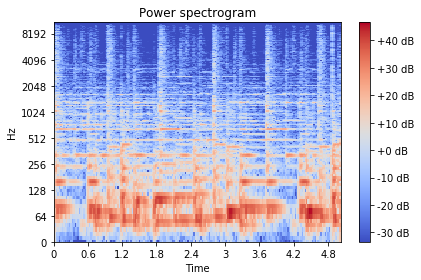

In [2]:
import matplotlib.pyplot as plt
from librosa import display
from IPython.display import Audio
display.specshow(librosa.amplitude_to_db(D), y_axis='log', x_axis='time', sr=sr, hop_length=hop)
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
Audio(data=y, rate=sr)

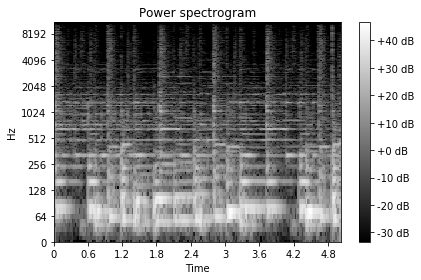

In [3]:
import matplotlib.pyplot as plt
from librosa import display
display.specshow(librosa.amplitude_to_db(D), y_axis='log', x_axis='time', cmap='gray', sr=sr, hop_length=hop)
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
Audio(data=y, rate=sr)

In [9]:
y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)
D = librosa.stft(y)
y_hat = librosa.istft(D)
Audio(data=y_hat, rate=sr)

In [10]:
n = len(y)
n_fft = 2048
y_pad = librosa.util.fix_length(y, n + n_fft // 2)
D = librosa.stft(y_pad, n_fft=n_fft)
y_out = librosa.istft(D, length=n)
Audio(data=y_out, rate=sr)

In [4]:
import librosa
y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)
librosa.feature.mfcc(y=y, sr=sr)

array([[-1.62159164e+02, -1.02731514e+02, -8.68847122e+01, ...,
        -2.80821259e+02, -2.44131592e+02, -2.13369202e+02],
       [ 1.18974670e+02,  1.00430084e+02,  9.05269165e+01, ...,
         1.93494324e+02,  1.58097443e+02,  1.35329285e+02],
       [ 6.98852444e+00,  6.20628417e-01,  8.05861664e+00, ...,
         3.49733315e+01,  3.17237148e+01,  3.39902458e+01],
       ...,
       [ 7.30405521e+00,  4.70762110e+00,  1.31141758e+00, ...,
         1.29032955e+01,  7.42025661e+00,  4.86201477e+00],
       [ 1.31991053e+01,  1.25032177e+01,  7.71923828e+00, ...,
         5.50620222e+00,  2.68712926e+00,  1.56249404e-01],
       [ 2.46421051e+00,  2.64739752e+00,  4.44236898e+00, ...,
         1.85265851e+00,  4.44370508e+00,  7.84341574e+00]], dtype=float32)

In [5]:
librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)

array([[-1.6276381e+02, -8.9025200e+01, -1.4089229e+02, ...,
        -1.0782481e+02, -2.5037590e+02, -2.3931360e+02],
       [ 1.2749146e+02,  9.5317184e+01,  1.0190823e+02, ...,
         1.1523336e+02,  2.2238391e+02,  1.7497104e+02],
       [ 1.1388008e+01,  6.1552358e+00,  1.2661100e+01, ...,
         4.5570557e+01,  4.5848167e+01,  3.9854446e+01],
       ...,
       [ 3.4622138e+00,  4.0315661e+00, -5.6938827e-01, ...,
        -6.6768336e+00, -1.1825210e-01,  1.4854668e+00],
       [ 9.5686185e-01,  1.0692396e+00, -6.8650694e+00, ...,
        -9.5978546e+00, -1.6105201e+00, -6.7159076e+00],
       [ 8.4571533e+00,  3.5823300e+00, -1.1561230e-01, ...,
        -3.0180655e+00, -1.4558303e+01, -6.9907746e+00]], dtype=float32)

In [6]:
mfcc = librosa.feature.mfcc(y=y, sr=sr)
mfcc.shape

(20, 216)

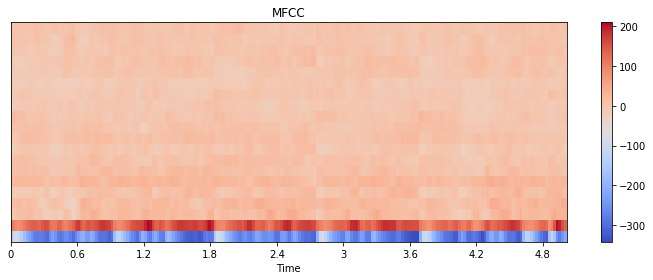

In [7]:
import matplotlib.pyplot as plt
from librosa import display
plt.figure(figsize=(10, 4))
display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()